<a href="https://colab.research.google.com/github/mkesari-data/ml/blob/master/cross_validation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load Dataset

In [ ]:
# prompt: can you import csv file from google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
filename = '/content/drive/My Drive/datasets/classification/decisiontree/titanic.csv'

import pandas as pd
df = pd.read_csv(filename)

## Basic Analysis

In [ ]:
df.shape

(891, 12)

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Basic Preprocessing

**1.   Eearlier We removed missing values records. **

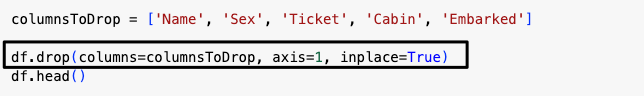

2.   Removed Categorical Data

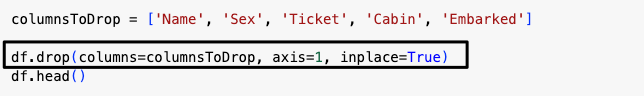

Did you realize how much valueable information we missed

<Axes: >

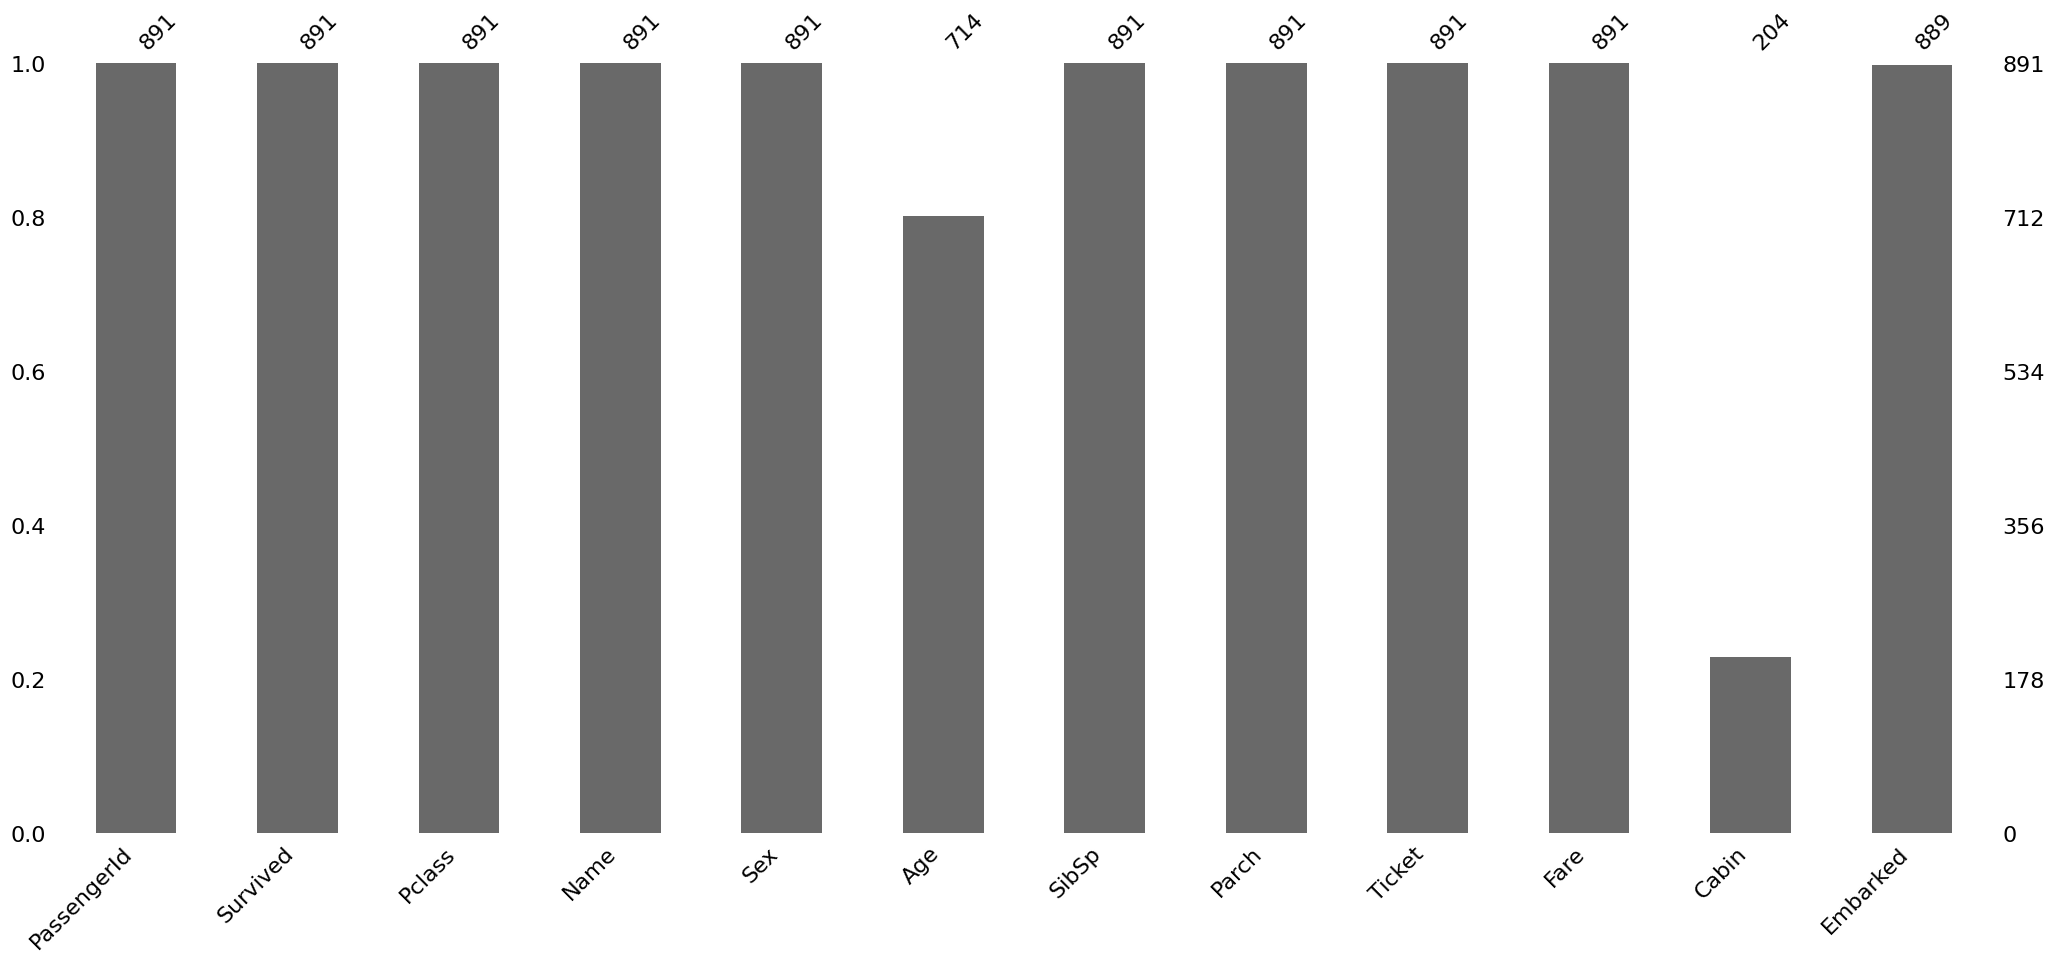

In [ ]:
# prompt: using missingno library and do dataprofiling of my df dataset

import missingno as msno
# Do data profiling using missingno
msno.bar(df)

<Axes: >

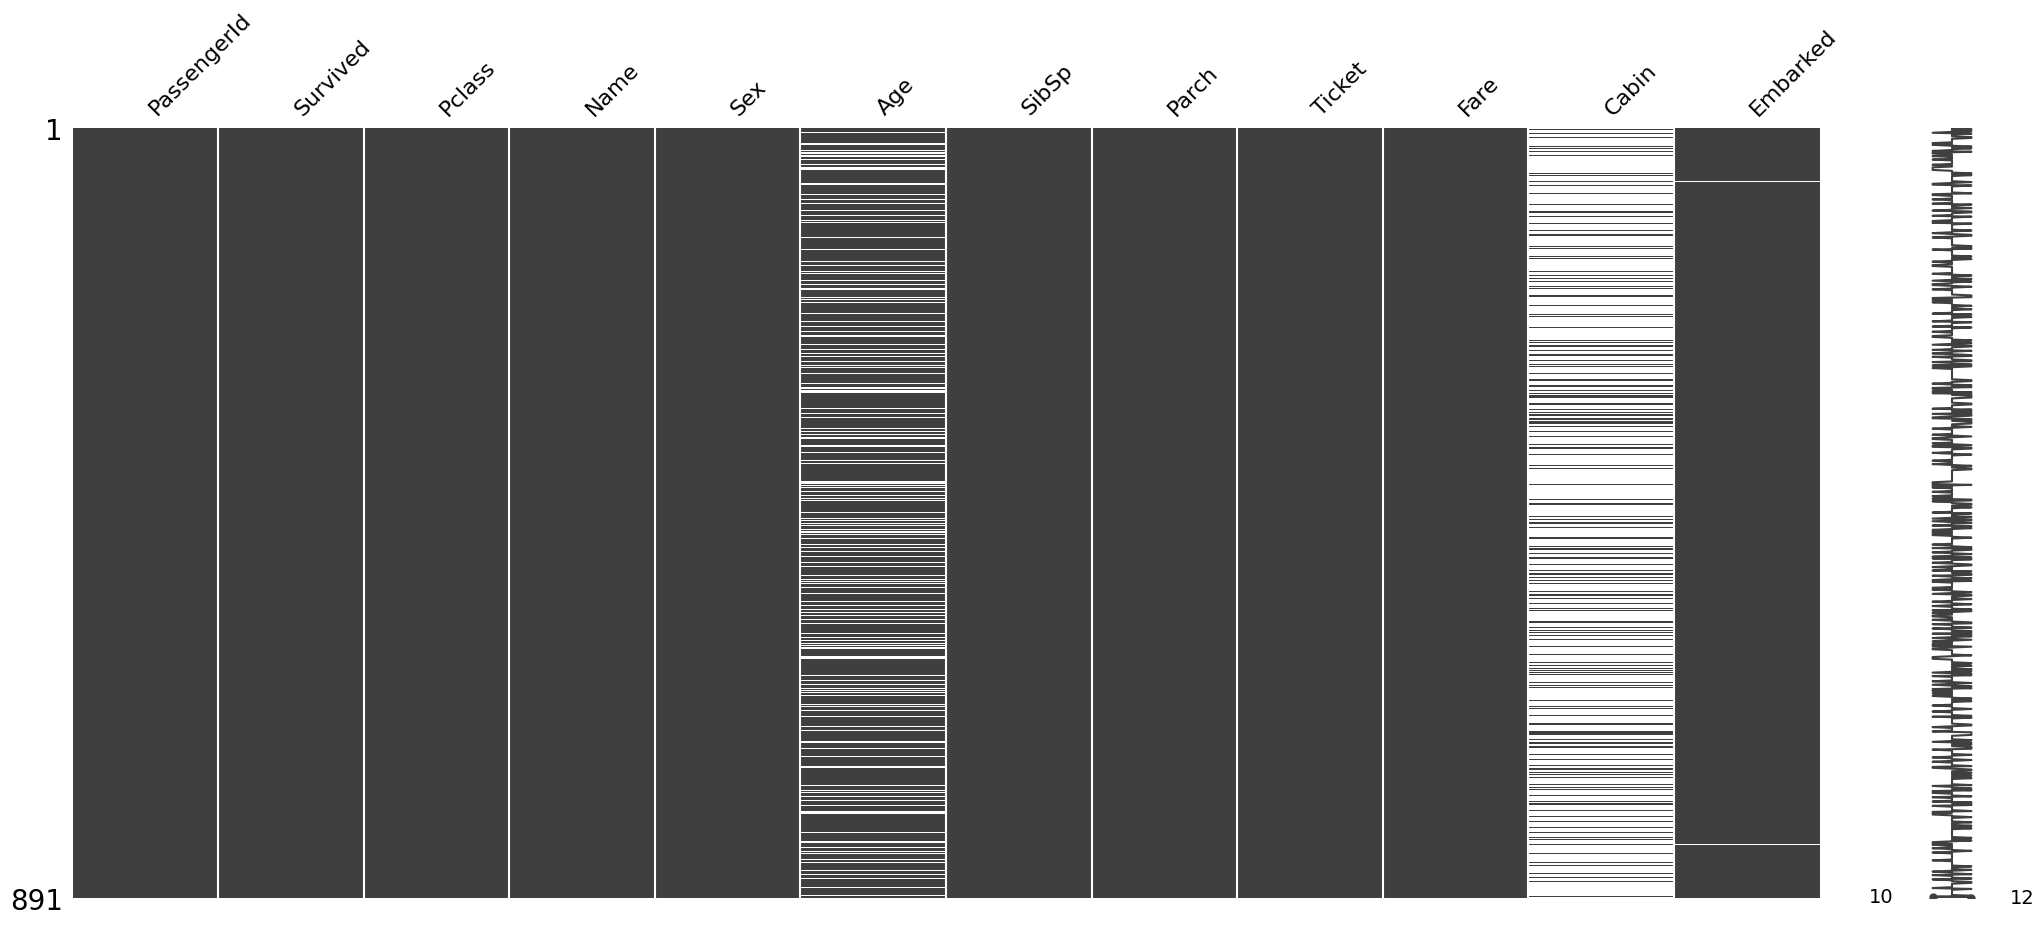

In [ ]:
msno.matrix(df)

### refill missing numerical Values.

In [ ]:
df.fillna(method='bfill' , inplace=True)
#df.fillna(method='bfill' , inplace=True)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        890 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Treate Cateogrical Data.

In [ ]:
categoricalColumns = ['Name' ,'Sex' ,'Ticket' ,'Cabin' ,  'Embarked'  ]
df_encoded = pd.get_dummies(df , columns= categoricalColumns)
df_encoded.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,"Name_Abbing, Mr. Anthony","Name_Abbott, Mr. Rossmore Edward","Name_Abbott, Mrs. Stanton (Rosa Hunt)",...,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,5,0,3,35.0,0,0,8.0500,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
df_encoded.shape

(891, 1731)

In [ ]:
# Drop few unncessary categorical columns like Name Ticket etc.
drop_columns = ['Name' , 'Ticket' , 'Cabin']
df.drop(drop_columns , axis =1 , inplace=True)

In [ ]:
categoricalColumns = ['Sex' , 'Embarked'  ]
df_encoded = pd.get_dummies(df , columns= categoricalColumns)
df_encoded.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,2,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,4,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,5,0,3,35.0,0,0,8.0500,0,1,0,0,1


# Split Data

In [ ]:
input_features_df = df_encoded.drop('Survived' , axis=1)
ouput_df = df_encoded.Survived

In [ ]:
from sklearn.model_selection import train_test_split

train_input_features_df, test_input_features, train_output_df, test_output_df = train_test_split(input_features_df , ouput_df , test_size=0.3 )

In [ ]:
train_input_features_df.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
145,146,2,19.0,1,1,36.7500,0,1,0,0,1
142,143,3,24.0,1,0,15.8500,1,0,0,0,1
221,222,2,27.0,0,0,13.0000,0,1,0,0,1
48,49,3,18.0,2,0,21.6792,0,1,1,0,0
793,794,1,25.0,0,0,30.6958,0,1,1,0,0


In [ ]:
train_input_features_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 623 entries, 145 to 635
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  623 non-null    int64  
 1   Pclass       623 non-null    int64  
 2   Age          623 non-null    float64
 3   SibSp        623 non-null    int64  
 4   Parch        623 non-null    int64  
 5   Fare         623 non-null    float64
 6   Sex_female   623 non-null    uint8  
 7   Sex_male     623 non-null    uint8  
 8   Embarked_C   623 non-null    uint8  
 9   Embarked_Q   623 non-null    uint8  
 10  Embarked_S   623 non-null    uint8  
dtypes: float64(2), int64(4), uint8(5)
memory usage: 37.1 KB


# Build Model on Training Data

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()

# train your model by providing input feature and output value for each input sample.
dt.fit(train_input_features_df , train_output_df)

DecisionTreeClassifier()

# Predict and Validate Model On Test Data

In [ ]:
#test your model by providing test data you saved.
test_predicted_op= dt.predict(test_input_features)

# print few records what it predicted.
print(test_input_features.head() ,"\n")
print(test_predicted_op[:5])

     PassengerId  Pclass   Age  SibSp  Parch     Fare  Sex_female  Sex_male  \
28            29       3  40.0      0      0   7.8792           1         0   
158          159       3  44.0      0      0   8.6625           0         1   
513          514       1  54.0      1      0  59.4000           1         0   
367          368       3  24.0      0      0   7.2292           1         0   
242          243       2  29.0      0      0  10.5000           0         1   

     Embarked_C  Embarked_Q  Embarked_S  
28            0           1           0  
158           0           0           1  
513           1           0           0  
367           1           0           0  
242           0           0           1   

[1 0 1 1 0]


In [ ]:
from sklearn.metrics import accuracy_score

acc_score_value = accuracy_score(test_output_df , test_predicted_op )
acc_score_value

0.6716417910447762

# Finally Save Model in File

In [ ]:
# prompt: save above dt model in pkl format file

import pickle

# Save the model to a file using pickle
with open('titanic_train_0302.pkl', 'wb') as f:
    pickle.dump(dt, f)


Can we see My model learned from which features are contributed more

In [ ]:
# Access feature importances
feature_importances = dt.feature_importances_
feature_importances



In [ ]:

# Create a DataFrame to display feature importances
importance_df = pd.DataFrame({'Feature': train_input_features_df.columns, 'Importance': feature_importances})

# Display the DataFrame sorted by importance
print(importance_df.sort_values(by='Importance', ascending=False))

In [ ]:
# prompt: Can I view my model visually

from sklearn.tree import export_graphviz
import graphviz

# Export the decision tree to a file
export_graphviz(dt, out_file='tree.dot', feature_names=train_input_features_df.columns, class_names=['Not Survived', 'Survived'], filled=True, rounded=True)

# Load the exported file as a graphviz object
with open('tree.dot') as f:
  dot_graph = f.read()

# Create a graphviz object from the string
graphviz_object = graphviz.Source(dot_graph)

# Display the graph
graphviz_object
